# 1) Underfitting and overfitting 
Today, we'll work on building a generalized linear regressor model (similar to the interface of scikit-learn models) that can generate polynomial and sinusoidal features and then perform regression using the normal equations. Complete each of the functions in the model using the docstrings (information in each function's comment) provided.

In [ ]:
class LinearModel(object):
    """Base class for linear models."""

    def fit(self, X, y):
            """Run solver to fit linear model. You have to update the value of
            self.theta using the normal equations.

            Args:
                X: Training example inputs. Shape (n_examples, dim).
                y: Training example labels. Shape (n_examples,).
            """

            # solve normal equations on dataset
            self.theta = (np.linalg.inv(X.T @ X))@(X.T @ y)
            return self.theta


    def create_poly(self, k, X):
        """
        Generates a polynomial feature map using the data X.
        The polynomial map should have powers from 2 to k.
        Output should be a numpy array whose shape is (n_examples, k+1)

        Args:
            k: Polynomial degree.
            X: Training example inputs. Shape (n_examples, 2).
        """   

        # append additional computed polynomial features of X to the power each integer between 2 and k (inclusive)
        a = len(X)
        X_poly = np.ones((a, k+1))
        b = 0
        while b < a:
            for i in range(k):
                X_poly[b, i+1] = np.power(X[b,0],i+1)
            b = b + 1

        return X_poly


    def create_sin(self, k, X):
        """
        Generates a sine with polynomial feature map to the data X.
        Output should be a numpy array whose shape is (n_examples, k+2).

        Args:
            k: Polynomial degree.
            X: Training example inputs. Shape (n_examples, 2).
        """

        # compute the k-polynomial feature matrix using the self.create_poly(k, X) function
        X_poly = self.create_poly(k, X)

        # append additional computed sine feature of X
        temp_arr = np.ones((len(X),1))
        for i in range(len(X)):
          temp_arr[i] = np.sin(X[i,0])
        X_sin = np.append(X_poly,temp_arr,axis=1)

        return X_sin


    def predict(self, X):
        """
        Make a prediction given new inputs x.
        Returns the numpy array of the predictions.

        Args:
            X: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """

        # generate predictions using model by accessing self.theta
        k = X.shape[1]
        preds = np.zeros((X.shape[0],1))
        for i in range(k):
          preds_1 = self.theta[i][0] * X[:,i]
          preds = preds + preds_1.reshape(-1,1)

        return preds

We'll now work to import two datasets.

In [ ]:
### for importing datasets from csv files
import io
from google.colab import files
import numpy as np
import pandas as pd

In the following cell, use the "Upload Files" button to upload the `train.csv` file.

In [ ]:
# upload train.csv
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

X_train = np.expand_dims(df.x.to_numpy(), -1)
### ADD CODE THAT APPENDS A COLUMN OF ONES TO THE LEFT OF THE DATASET MATRIX

y_train = np.expand_dims(df.y.to_numpy(), -1)

Saving train.csv to train.csv


In the following cell, use the "Upload Files" button to upload the `small.csv` file.

In [ ]:
# upload small.csv
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['small.csv'].decode('utf-8')))

X_small = np.expand_dims(df.x.to_numpy(), -1)
### ADD CODE THAT APPENDS A COLUMN OF ONES TO THE LEFT OF THE DATASET MATRIX

y_small = np.expand_dims(df.y.to_numpy(), -1)

Saving small.csv to small.csv


In the following code, we'll define how to run our own experiment that will generate many linear models based on the `k` values we provide and a Boolean flag `sine` that will control whether or not sine features are added or not.

In [ ]:
import matplotlib.pyplot as plt

def run_exp(X_train, y_train, sine=False, ks=[1]):

    # generate plotting data
    X_plot = np.ones([1000, 2])
    X_plot[:, 1] = np.linspace(-2*np.pi, 2*np.pi, 1000)

    # generate a new figure and then make a scatterplot of the training data 
    fig = plt.figure()
    plt.scatter(X_train, y_train, c='black', marker='o', label='Dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    i = 0
    for k in ks:

        # Our objective is to train models and perform predictions on X_plot_mapped data
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

        # make a linear model
        lm = LinearModel()

        # map our examples to the feature space using polynomial or polynomial & sine features
        if sine is not True:
            # map the X_train data using the LinearModel.create_poly(k, X_train) function and do the same for X_plot
            X_train_mapped = lm.create_poly(k, X_train)
            X_plot_mapped  = lm.create_poly(k, X_plot)
            ### ADD A PLOT TITLE BASED ON THE K-VALUES
            plt.title("Dataset where k = %d" %k)
        elif sine is True:
            # map the X_train data using the LinearModel.create_sin(k, X_train) function and do the same for X_plot
            X_train_mapped = lm.create_sin(k, X_train)
            X_plot_mapped  = lm.create_sin(k, X_plot)
            ### ADD A PLOT TITLE BASED ON THE K-VALUES AND SINE
            plt.title("Dataset where k = %d and has contains sine parameters" %k)

        # fit the model using the LinearModel.fit(X, y) with the feature-mapped training data
        lm.fit(X_train_mapped, y_train)

        # generate predictions using the LinearModel.predict(X) function on the feature-mapped plotting data
        Y_plot = lm.predict(X_train_mapped)

        # plot model function using plotting prediction data -- also use this label in your plot: label='k=%d' % k
        plt.plot(X_train[:, 0], Y_plot.reshape(-1,1), color=colors[i], label='k = %d' % k, alpha = 0.5)
        i = i+1


    plt.legend()
    plt.show()

Use the `run_exp` function to run the same 4 experiments on each dataset (4 for `X_train`, 4 for `X_small`):

* `ks = [2]`
* `ks = [2, 3, 5, 10, 20]`
* `ks = [2]` with `sine=True`
* `ks = [2, 3, 5, 10, 20]` with `sine=True`

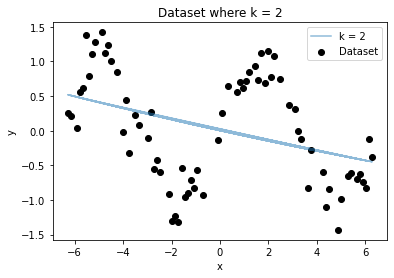

In [ ]:
run_exp(X_train, y_train, sine=False, ks=[2])

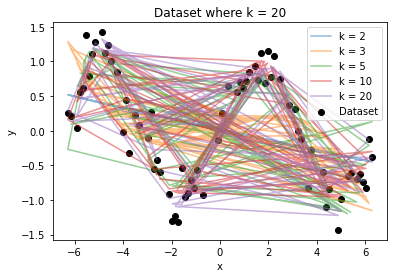

In [ ]:
run_exp(X_train, y_train, sine=False, ks=[2,3,5,10,20])

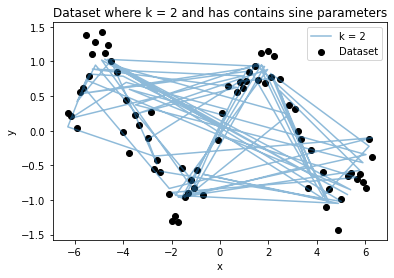

In [ ]:
run_exp(X_train, y_train, sine=True, ks=[2])

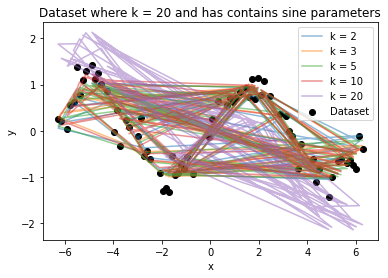

In [ ]:
run_exp(X_train, y_train, sine=True, ks=[2,3,5,10,20])

Describe what you see in the results of these experiments and relate this to the bias-variance tradeoff and model overfitting & underfitting.

Using functions of higher degrees can cause `overfitting` whereas using functions of lower degrees can cause `underfitting` as seen in the cases of k=20 and k=2 respectively.

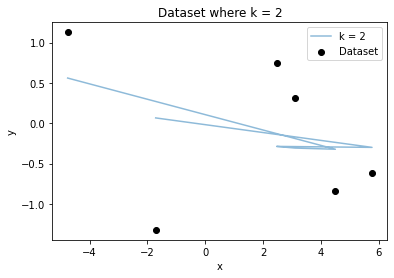

In [ ]:
run_exp(X_small, y_small, sine=False, ks=[2])

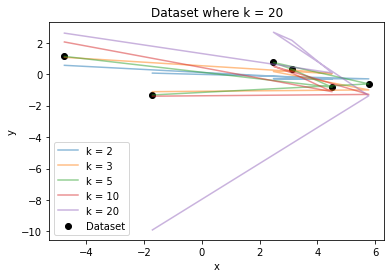

In [ ]:
run_exp(X_small, y_small, sine=False, ks=[2,3,5,10,20])

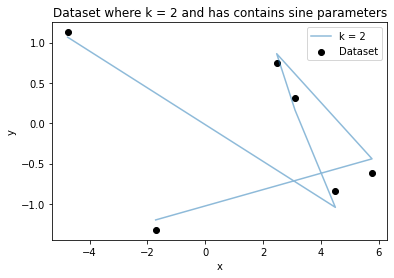

In [ ]:
run_exp(X_small, y_small, sine=True, ks=[2])

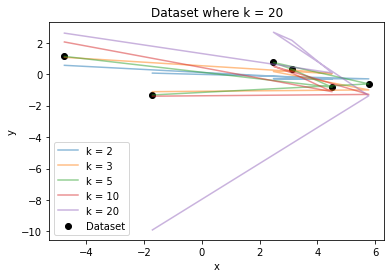

In [ ]:
run_exp(X_small, y_small, sine=False, ks=[2,3,5,10,20])

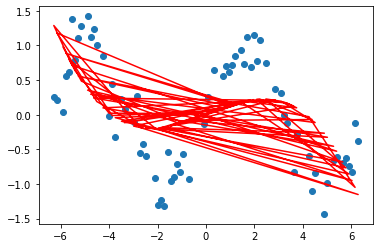

In [ ]:
#Check implementation using SK-Learn library (as an experiment using k=3)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_x = poly.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_train_x, y_train)
y_hat = reg.intercept_[0] + reg.coef_[0][1]*X_train + reg.coef_[0][2]*np.power(X_train, 2) + reg.coef_[0][3]*np.power(X_train, 3)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat, c='r')

In [ ]:
from sklearn.metrics import r2_score
print("R2 score for the above plot is: %.2f" %r2_score(y_hat, y_train))
#Bad model

R2 score for the above plot is: -1.08


# 2) (Not required) Approximate Fourier series regression

The Fourier series ([Brilliant](https://brilliant.org/wiki/fourier-series/); [Wikipedia](https://en.wikipedia.org/wiki/Fourier_series)) is an infinite series of harmonic cosine waves, each with a different amplitude, frequency, and phase offset. (It is similar to the Taylor series if you have heard of that in your calculus class.)

$$ f(x) = a_0 + \sum_{n=1}^\infty A_n \cos \left(2\pi n x + \phi_n \right) $$ 

The Fourier series can be shown to converge to any periodic (repeating) function, which means that if we solve for the correct amplitudes ($a_0$ and $A_n$'s) & phase shifts ($\phi_n$'s) and then add up all the infinite terms in the sum, the Fourier series will start to look exactly like our function. You can see this in the GIF below (blue is true function, red is Fourier series with $N$ terms):

![Fourier series convergence](https://upload.wikimedia.org/wikipedia/commons/3/37/Example_of_Fourier_Convergence.gif)

We will use the Fourier series' convergence property to perform regression. In order to do this, we need to briefly exploit the double-angle formula to separate the cosine and its phase shift $\phi_j$. The double-angle formula is:

$$ \cos(a + b) = \cos(a)\cos(b) - \sin(a)\sin(b) $$

Applying this to our cosine term:

$$ A_n \cos \left( 2\pi n x + \phi_n \right) = A_n \cos\left( 2\pi n x \right)\cos(\phi_n) - A_n \sin\left(2 \pi n x \right)\sin(\phi_n) $$

And since $\cos(\phi_j)$ and $\sin(\phi_j)$ are each separate numbers, we can can combine them with the amplitudes in front of each term to define a new amplitude ($a_n$ for the cosine term and $b_n$ for the sine term).

$$ A_n \cos\left( 2\pi n x + \phi_n\right) = a_n \cos\left(2\pi n x\right) + b_n \sin\left( 2\pi n x \right) $$

Ultimately, this means we can just use a feature map of consisting of a 1 and cosines and sines with increasing frequencies and all we need to fit are the leading coefficients.

$$ {f}(x) = a_0 + \sum_{n=1}^\infty \left[ a_n \cos(2\pi n x) + b_n \sin(2\pi n x) \right] $$

Since the series is infinite and we only have a finite amount of memory, we will truncate the series to some number of terms, $N$:

$$ \hat{f}(x) = a_0 + \sum_{n=1}^N \left[ a_n \cos(2\pi n x) + b_n \sin(2\pi n x) \right] $$

Thus, our model might be something like the following (up to $N$ terms):

$$ \hat{f}(x) = \theta_0 (1) + \theta_1 \cos(2\pi x) + \theta_2 \sin(2\pi x) + \theta_3 \cos(4\pi x) + \theta_4 \sin(4\pi x) + \theta_5 \cos(6\pi x) + \theta_6 \sin(6\pi x)~+~... $$

(Not required) Reuse the `LinearModel` code as above -- I suggest copying the entire class below, renaming the class to `FourierModel` and removing the `create_poly` and `create_sin` functions, though you'll be using the general idea as we did previously. Write a new method called `create_fourier(N, X)` that creates the feature-mapped matrix using with ones in the first column along with the cosine and sine features with frequency 2$\pi n$ with $n$ ranging from 1 to `N` in the rest of the columns. Then, copy the `run_exp` function, rename it to `run_exp_fourier`, and edit the function to work with your `FourierModel`. Run experiments on the X_train and X_small datasets with any number of components (N) less than or equal to 10. Report on what you observe.

You might try generating 50 or 100 samples of data from some of the 1D functions in Problem Set 4 and then adding a little bit of noise as we did in the `lecture_6_batch_gradient_descent` notebook (in the Lecture 6 module on Canvas) and seeing how you can fit those functions using the Fourier series approximation.

In [ ]:
### CODE HERE

In [ ]:
reg.coef_[0][1]*X_train

array([[-0.23389015],
       [ 0.78829644],
       [ 0.33784133],
       [ 0.42446731],
       [ 0.61504448],
       [-0.64969487],
       [ 0.73632085],
       [-0.75364605],
       [-0.85759723],
       [-0.37249172],
       [ 0.85759723],
       [-0.28586574],
       [-0.77097124],
       [-0.73632085],
       [-0.54574369],
       [ 0.0086626 ],
       [-0.5110933 ],
       [ 0.82294683],
       [-0.16458937],
       [ 0.04331299],
       [-0.52841849],
       [-0.84027203],
       [ 0.12993897],
       [-0.71899565],
       [ 0.09528858],
       [-0.45911771],
       [ 0.26854055],
       [-0.25121535],
       [ 0.66702007],
       [-0.09528858],
       [ 0.59771928],
       [ 0.30319094],
       [ 0.11261378],
       [-0.40714212],
       [-0.38981692],
       [-0.35516653],
       [-0.61504448],
       [-0.80562164],
       [-0.70167046],
       [-0.12993897],
       [-0.19923976],
       [ 0.14726417],
       [-0.78829644],
       [ 0.16458937],
       [ 0.58039408],
       [ 0